## Veri İçeriği
Hasta durumu tahmin etme? -iyi huy kötü huy tahmin etme?
#### Attribute Information(Öznitelik Bilgileri)
- ID number
- Diagnosis (M = malignant(kötü huylu), B = benign)
#### Ten real-valued features are computed for each cell nucleus
Her hücre için 10 gerçek değerli özellik hesaplanır.

- radius (mean of distances from center to points on the perimeter)
Tüm hücrelerin yarıçapları ortalaması, standart sapması ve en
kötü değeri

- texture (standard deviation of gray-scale values)
İç yüzeylerin gri skaladaki değişim oranlarının ortalaması,
standart sapması ve en kötü değeri

- perimeter(çevre)
Hücrelerin çevre uzunlukları ortalaması, standart sapması ve
en kötü değeri

- area(alan)
Hücrelerin yüzey alanları ortalaması, standart sapması ve en kötü
değeri

- smoothness (local variation in radius lengths)(yarıçap uzunluk değişimi)
Komşu hücrelerin yarıçap uzunluklarının ortalaması,
standart sapması ve en kötü değeri

- compactness (perimeter^2 / area - 1.0)
Çevre²/Alan = Yoğunluk ortalaması, standart sapması 

- concavity (severity of concave portions of the contour)
Hücre çevresindeki girinti ve çıkıntıların büyüklükleri
ortalaması, standart sapması ve en kötü değeri

- concave points (number of concave portions of the contour)
Hücre çevresindeki girinti ve çıkıntı nokta sayısının
ortalaması, standart sapması ve en kötü değeri

- symmetry
Hücrelerin elips Ģekil değişikliği ortalaması, standart
sapması ve en kötü değeri

- fractal dimension ("coastline approximation" - 1)
İç içe geçmiş düzensiz hücrelerin tüm normal
hücrelere oranının ortalaması, standart sapması ve en kötü değeridir.



In [2]:
#Kütüphanelerin  yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
data=pd.read_csv('breast-cancer.csv')

##### - Pandas kütüpahnesi ile veri setimizi yükledik.

#### 1-Veri setinin inclenmesi

- Veri setindeki tüm satırlar

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- Veri setinin boyutu

In [5]:
data.shape

(569, 32)

- 569 satır ve 33 sütundan oluşan bir veri setine sahibiz.

- İlk 20 verinin değerlerine genel bakış

In [6]:
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


- Yukarıdaki veri değerlerine bakılınca:
  - Sınıflandırma için kullanılamayan bir id var.
  - Diagnosis class labeldır.
  - Unnamed:32 özellik nan'ı içerir.( bu yüzden buna ihtiyacımız yok)sonuçlarına ulaşılır.

- Veri setinin istatiksel özeti

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#özelliklerin veri tipleri
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Veride genel olarak float tipinde değişkenler var

In [9]:
# Özellik adlarını liste olarak alma
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
#her sütunundaki eksik değerleri kontrol etme
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- Verilerimiz de her sütunda kaç adet eksik (NaN) değer olduğunu gösteriyor. Çıktıdaki her sütun adı, sütundaki eksik değer sayısını ve toplam veri noktası sayısını belirtir. Örneğin, “Unnamed: 32” sütununda 569 eksik değer bulunmaktadır. Diğer sütunlarda ise eksik değer yok gibi görünüyor, çünkü bu sütunların eksik değer sayısı sıfır olarak listeleniyor. # Unnamed: 32’ sütununu veri çerçevesinden çıkarır:

In [11]:
#satırın bir önceki satırın kopyası olması durumunda true tersi durumda false döndürür.
data.duplicated().sum()

0

In [ ]:
#Eksik veri içeren kolonu silme
data.drop(columns=['Unnamed:32'],inplace = True)
#Daha önceden çalıştığı için silindi sonrasında hata veriyor

In [ ]:
#Silinen veriyi kontrol etme
data.shape

(569, 32)

In [ ]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

- "diagnosis" sütunundaki farklı değerlerin sayısını value_counts() fonksiyonuyla elde ediyoruz. Bu fonksiyon, her bir farklı değerin kaç kez tekrarlandığını gösteren bir seri döndürüyor.

<Axes: xlabel='count', ylabel='diagnosis'>

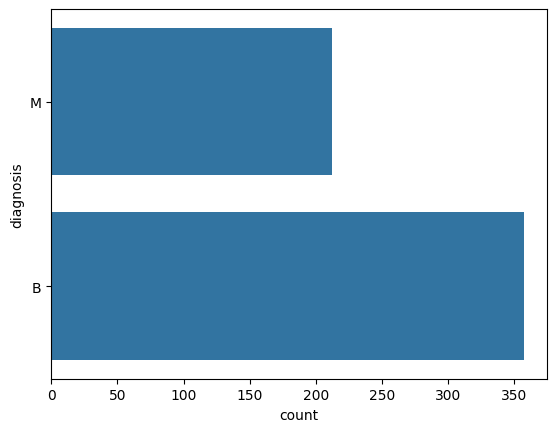

In [ ]:
#"diagnosis" sütunundaki değerlerin sayısını görselleştirmek.
#import seaborn as sns
sns.countplot(data["diagnosis"],label="count")


212 kötü huylu tümör 
357 iyi huylu tümör

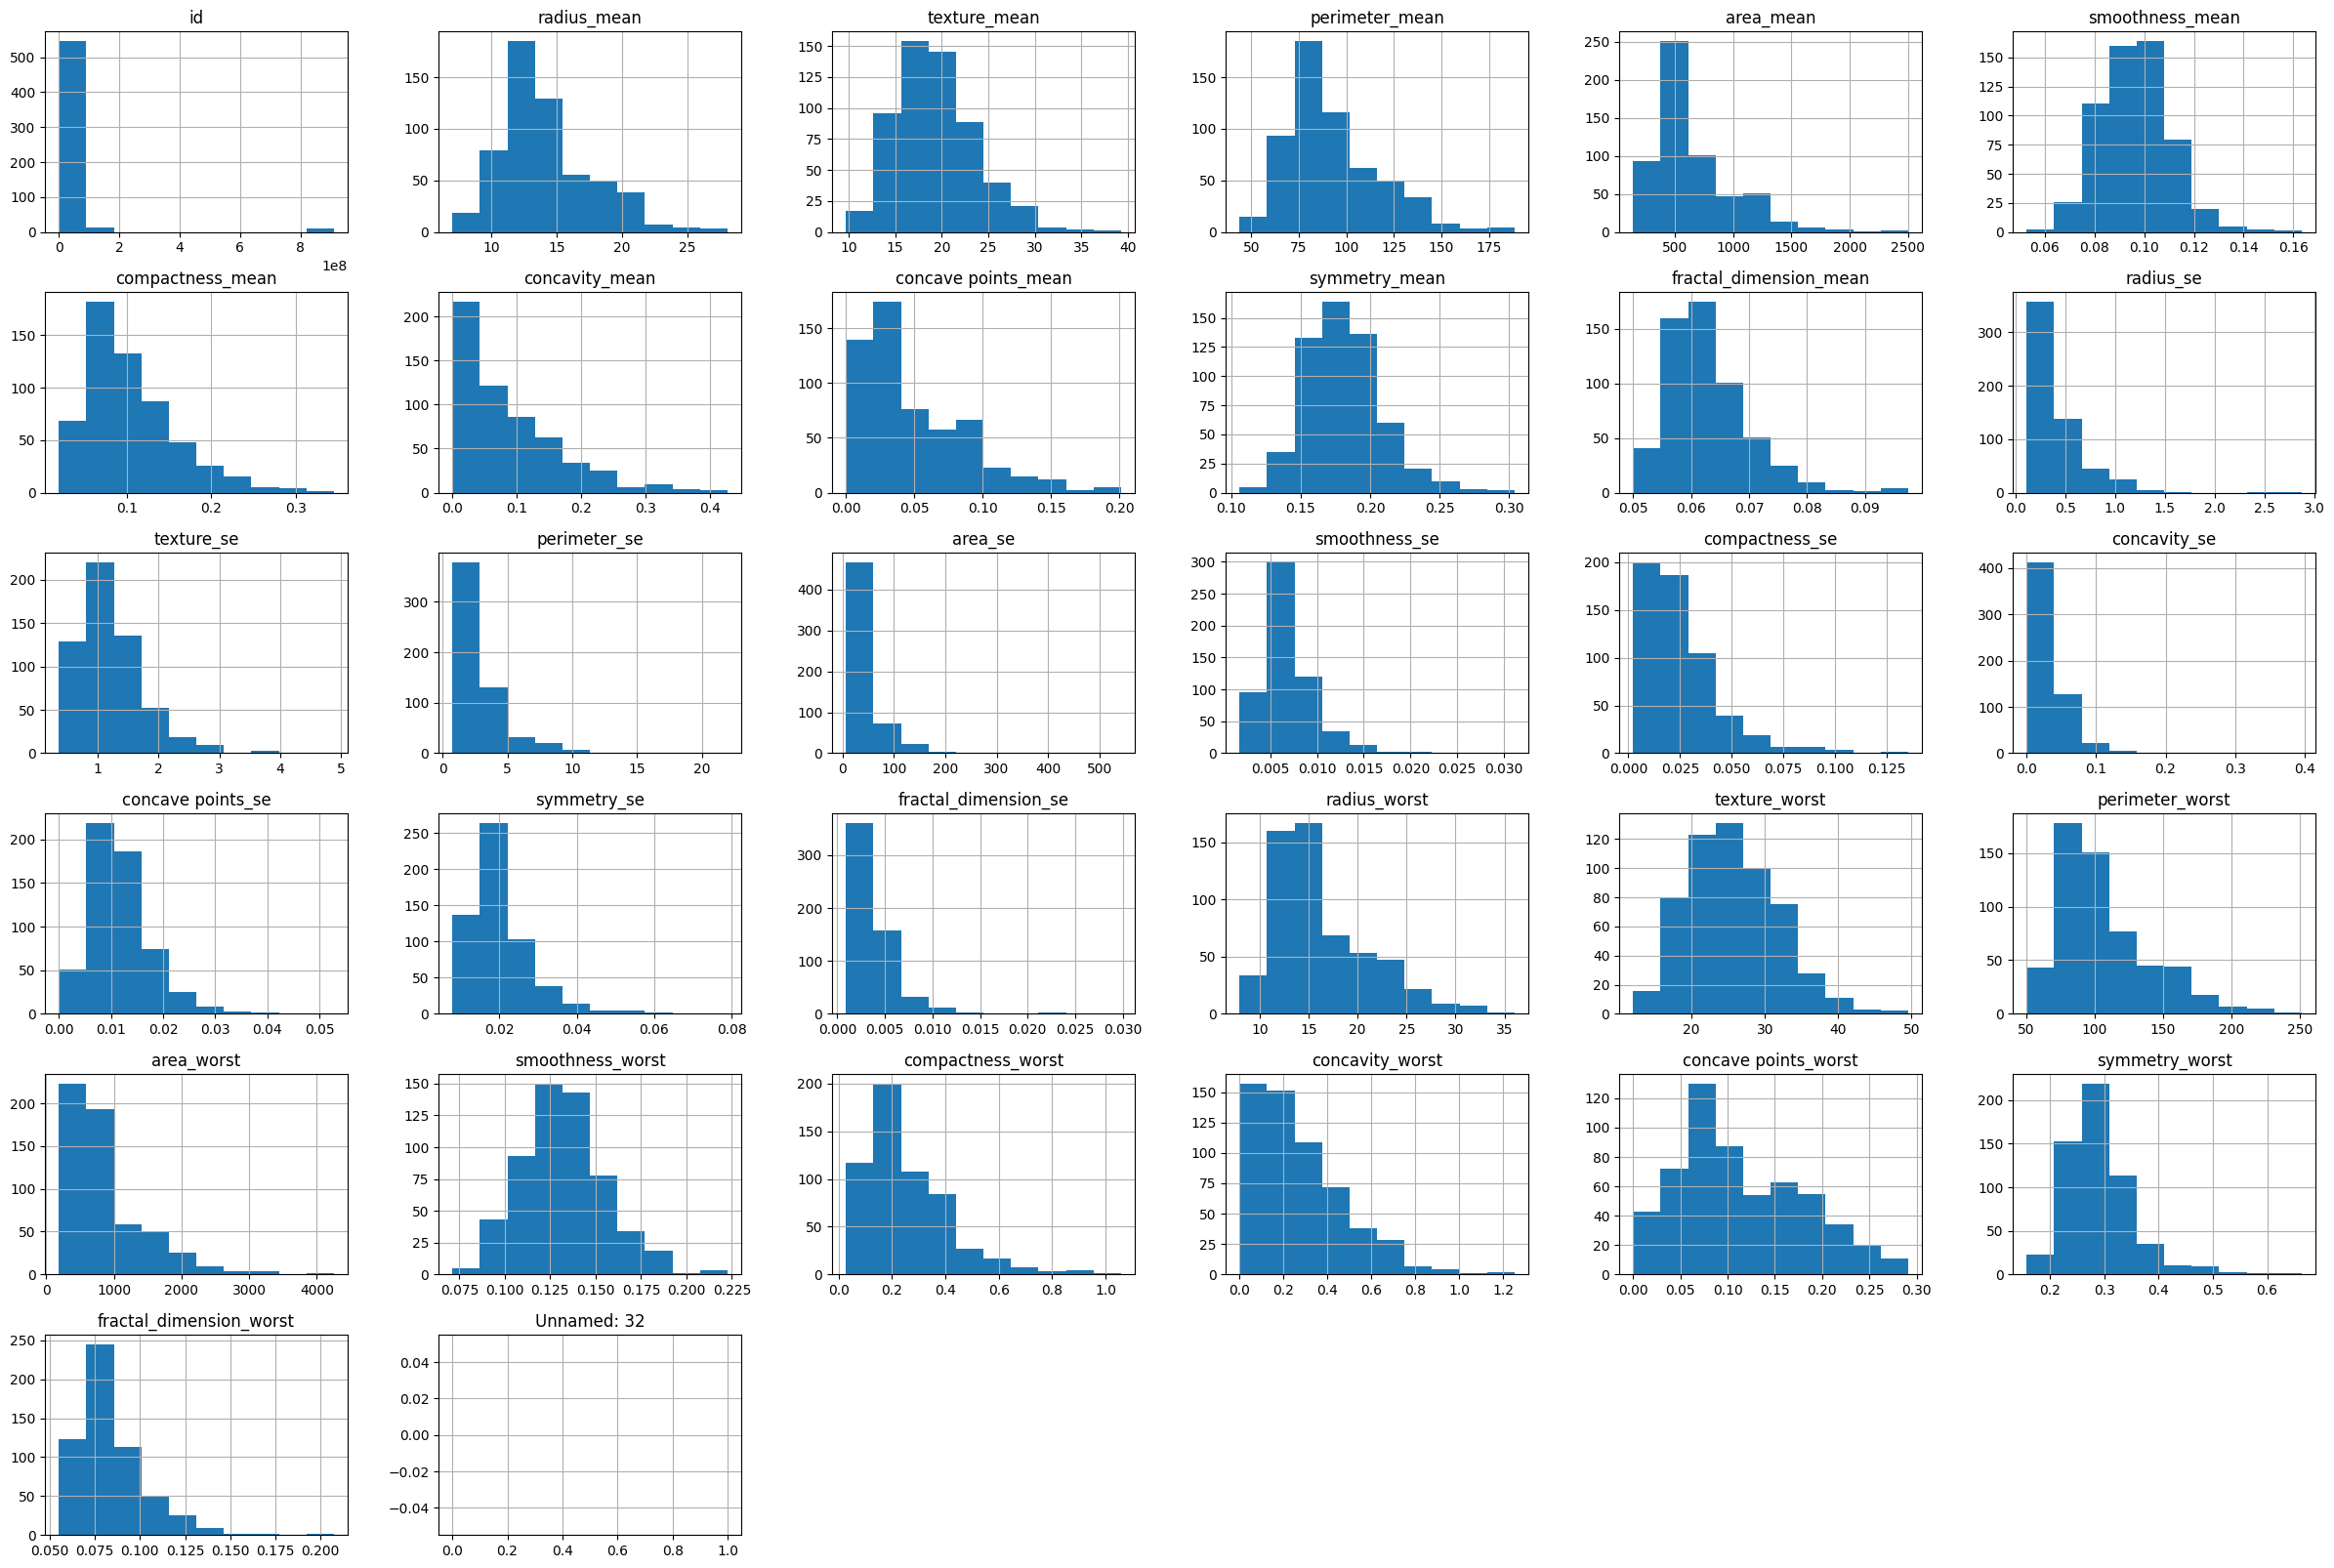

In [ ]:
data.hist(figsize=(30,20))
plt.show()
#histogram ile  özelliklerin dağılımı